# Smart Beta ETF and Factor Investment

Modelo de 5 factores de Fama y French


El modelo de los 5 factores de Fama y French buscan explicar el conjunto comun de fuerzas o factores impulsores que explican los rendimientos promedio y los riesgos sistematicos de las acciones.

En otras palabras explica una relacion sistematica entre los rendimientos promedio de las acciones y 5 factores (razones) subyacentes. Las cuales son:

  1. Riesgo de mercado (CAPM normal - beta)
  2. Factor de tamaño de la empresa
  3. Factor de valor
  4. Factor de rentabilidad
  5. Factor de inversion
  6. Factor de impulso (Momentum)

De esta manera y a traves del analisis o incorporacion de mas variables al modelo tradicional CAMP, permite capturar otras condiciones o fuentes de mercado relevantes para el inversionista para capturar su retornos. De cierta manera pone el peso del retorno no solo en cuestiones de riesgo de mercado (beta) si no en otras variables fundamentales, por lo tanto incorpora que el inversionista puede obtener rentabilidades no solo por el riesgo de mercado, si no tambien por los demas factores que afectan los retornos de los activos



2) Comparacion portafolios de factores

comparacion de los resultados presentados en las figuras,
estimadas con datos anuales de 1964 al 2014, con los datos mensuales que se deben
descargar de la página de Keneth French Kenneth R. French - Data Library
(dartmouth.edu)

## Importacion de librerias

In [ ]:
# Librerias basicas
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt

In [ ]:
# Librerias que permiten hacer solicitudes de informacion a direccioness URL y descompimir un archivo zip
import urllib.request
import zipfile

In [ ]:
# Módulo 'drive' permite guardar y consultar el contenido en nuestras carpetas de 'google drive'.
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Declaracion de funciones

In [ ]:
def Consulta_FF(Archivo):
  '''Esta función descarga los datos desde la página de Fama y French.  Requiere el
    nombre del archivo a descargar.

    Los datos vienen en un archivo .zip, el código los descomprime y los guarda en una carpeta
    del google Drive que hemos llamado "FamaFrenchData"'''

  url = "https://mba.tuck.dartmouth.edu/pages/faculty/ken.french/ftp/"+Archivo+".zip"
  urllib.request.urlretrieve(url,'fama_french.zip')
  zip_file = zipfile.ZipFile('fama_french.zip', 'r')
  zip_file.extractall("/content/drive/My Drive/FamaFrench/")
  zip_file.close()
  print('Archivo: {} descargado exitosamente'.format(Archivo))

In [ ]:
def Limpia_FF(Archivo, skiprows):
  '''Carga los datos de la carpeta, requiere el nombre del archivo y un indicador de cuantas
    filas se deben ingorar antes de llegar al encabezado.  Los archivos tradicionalmente traen
    varios sets de datos, por ejemplo un primer bloque de datos mensuales y un segundo de datos anuales,
    algunos archivos traen más bloques por ejemplo dependiendo de la ponderación.  El código asume que se
    requiere solo el primer bloque.'''

  Datos = pd.read_csv('/content/drive/My Drive/FamaFrench/'+Archivo+'.csv', skiprows = skiprows, encoding='latin1')

  #Identifica los bloques
  Filas_Nulas = Datos[Datos[Datos.columns[1]].isnull()]
  Data=Datos.iloc[:Filas_Nulas.index[0]]

  #Da formatos a los números y establece la fecha como índice.
  Data = Data.rename(columns={Data.columns[0]:'Fecha'})
  Data['Fecha'] = Data['Fecha'].str.replace(' ', '')
  Data['Fecha'] = pd.to_datetime(Data['Fecha'], format= '%Y%m')
  Data=Data.set_index('Fecha')
  for columna in Data.columns:
    Data[columna]=Data[columna].astype(float)
  Data = Data / 100
  return Data

In [ ]:
def filtra(Data, fecha_inicio, M = None):
    '''Esta función filtra los datos desde el 2015 a la fecha para el analisis del caso
       Tambien filtra unicamente las columnas que seran necesarias'''

    if M == None:
      # Renombrar columnas para mayor facilidad
      Data.rename(columns={'Lo 20': 'Lo_20', 'Qnt 2': 'Qnt_2', 'Qnt 3': 'Qnt_3', 'Qnt 4': 'Qnt_4', 'Hi 20': 'Hi_20'}, inplace = True)

      # Filtrar columnas y filas necesarias
      Data = Data.loc[fecha_inicio:, ['Lo_20', 'Qnt_2', 'Qnt_3', 'Qnt_4', 'Hi_20']]

    else:
      Data['Lo_20'] = (Data['Lo PRIOR']+Data['PRIOR 2'])/2
      Data['Qnt_2'] = (Data['PRIOR 3'] + Data['PRIOR 4'])/2
      Data['Qnt_3'] = (Data['PRIOR 5'] + Data['PRIOR 6'])/2
      Data['Qnt_4'] = (Data['PRIOR 7'] + Data['PRIOR 8'])/2
      Data['Hi_20'] = (Data['PRIOR 9'] + Data['Hi PRIOR'])/2

      # Filtrar columnas y filas necesarias
      Data = Data.loc[fecha_inicio:, ['Lo_20', 'Qnt_2', 'Qnt_3', 'Qnt_4', 'Hi_20']]

    return Data


In [ ]:
def grafica_portafolios(data, indicador):
  # Crea un gráfico de barras de las medias
  plt.figure(figsize=(7, 5))
  plt.bar(data.index, data.values)
  plt.ylabel('Average Return')
  nombre = ['Firm Size', 'and the Book-to-Market Ratio', 'and Profitability', 'and Investment', 'and the CAPM Beta', 'and Momentum']
  plt.title('Relationship Between Average Returns '+nombre[indicador])
  plt.show()

In [ ]:
def grafica_tiempo(data, indicador, promedio):

  plt.figure(figsize=(7, 5))
  nombre = ['Size', 'Book-to-Market Ratio', 'Profitability', 'Investment', 'CAPM Beta', 'Momentum']

  if indicador == 4:
    print('CAMP beta no es necesario')
  else:
    plt.plot(data.index, data.values, label=nombre[indicador]+' behavior')

    # Agrega una línea horizontal en la posición del promedio
    plt.axhline(y=promedio, color='r', linestyle='--', label='Average')

    plt.xlabel('Año')
    plt.ylabel('Retorno')
    plt.title(f'Serie Temporal del Factor {nombre[indicador]}')
    plt.legend()
    plt.grid(True)
    print(f'\tEl promedio del factor {nombre[indicador]} es de: {promedio}')
    plt.show()

## Descarga y filtrado de:
1. Univariate sorts on: Size, B/M, OP, and Inv
2. Sorts involving Accruals, Market Beta, Net Share Issues, Daily Variance, and Daily Residual Variance: Portfolios Formed on Market Beta
3. Sorts involving Prior Returns: 10 Portfolios Formed on Momentum

1. Portfolios Formed on Size
2. Portfolios Formed on Book-to-Market
3. Portfolios Formed on Operating Profitability
4. Portfolios Formed on Investment

5. Portfolios Formed on Market Beta

6. 10 Portfolios Formed on Momentum

In [ ]:
# Descarga de datos de los portafolios
Lista_archivos = ["Portfolios_Formed_on_ME_CSV", "Portfolios_Formed_on_BE-ME_CSV", "Portfolios_Formed_on_OP_CSV", "Portfolios_Formed_on_INV_CSV", "Portfolios_Formed_on_BETA_CSV", "10_Portfolios_Prior_12_2_CSV"]

for i in Lista_archivos:
  Consulta_FF(i)

Archivo: Portfolios_Formed_on_ME_CSV descargado exitosamente
Archivo: Portfolios_Formed_on_BE-ME_CSV descargado exitosamente
Archivo: Portfolios_Formed_on_OP_CSV descargado exitosamente
Archivo: Portfolios_Formed_on_INV_CSV descargado exitosamente
Archivo: Portfolios_Formed_on_BETA_CSV descargado exitosamente
Archivo: 10_Portfolios_Prior_12_2_CSV descargado exitosamente


In [ ]:
# Limpiar los datos de los portalios y creacion de DF
fecha = '2015-01-01 00:00:00'
# Convertir la fecha en formato string a un objeto datetime
fecha_datetime = datetime.strptime(fecha, '%Y-%m-%d %H:%M:%S')

# 1.
data_size = Lista_archivos[0][:-4]
datos_limpios_ME = Limpia_FF(data_size,12)
datos_ME = filtra(datos_limpios_ME, fecha_datetime)

# 2.
data_BM = Lista_archivos[1][:-4]
datos_limpios_BEME = Limpia_FF(data_BM,23)
datos_BM = filtra(datos_limpios_BEME, fecha_datetime)

# 3.
data_OP = Lista_archivos[2][:-4]
datos_limpios_OP = Limpia_FF(data_OP, 24)
datos_OP = filtra(datos_limpios_OP, fecha_datetime)

# 4.
data_INV = Lista_archivos[3][:-4]
datos_limpios_INV = Limpia_FF(data_INV, 17)
datos_INV = filtra(datos_limpios_INV, fecha_datetime)

# 5.
data_MB = Lista_archivos[4][:-4]
datos_limpios_MB = Limpia_FF(data_MB, 15)
datos_MB = filtra(datos_limpios_MB, fecha_datetime)

# 6.
data_M = Lista_archivos[5][:-4]
datos_limpios_M = Limpia_FF(data_M, 10)
datos_M = filtra(datos_limpios_M, fecha_datetime, 'M')


## Preguntas:



1. Considere los datos desde enero 2015 hasta la fecha. Calcule los retornos
anualizados para los cada uno de los portafolios en las diferentes dimensiones
(beta, size, B/M, profitability, investment, momentum) y grafíquelos (son 5
portafolios por cada una de las 6 dimensiones para un total de 30 portafolios).
Compare los resultados con los presentados en el caso para el periodo 1964-2014.
¿Han cambiado las regularidades?

In [ ]:
# Calculo de rendimientos anuales de cada portafolio

Lista_data = [datos_ME, datos_BM, datos_OP, datos_INV, datos_MB, datos_M]
Lista_columnas = ['Lo_20', 'Qnt_2', 'Qnt_3', 'Qnt_4', 'Hi_20']
Lista_df = []

df_inicial = pd.DataFrame() # Inicializar dataframe

for i in Lista_data: #
    for j in Lista_columnas:
        df_inicial[j] = i.groupby(i.index.year)[j].apply(lambda x: (1 + x).prod() - 1)  # suma compuesta de tasas
    Lista_df.append(df_inicial)
    df_inicial = df_inicial.iloc[0:0] # Borrar dataframe para proxima iteracion

print(Lista_df[0])

          Lo_20     Qnt_2     Qnt_3     Qnt_4     Hi_20
Fecha                                                  
2015  -0.083405 -0.044630 -0.048935 -0.013609  0.011763
2016   0.214729  0.218364  0.204524  0.162801  0.119810
2017   0.149336  0.161569  0.166666  0.233040  0.231099
2018  -0.132279 -0.091530 -0.123031 -0.089494 -0.037768
2019   0.197432  0.237555  0.292328  0.300461  0.310578
2020   0.286654  0.182047  0.244154  0.244423  0.235225
2021   0.271881  0.184029  0.139716  0.185242  0.261514
2022  -0.223874 -0.195730 -0.179101 -0.170930 -0.195571
2023   0.068016  0.196102  0.201455  0.178031  0.284948
2024   0.041763  0.032710  0.043018  0.098116  0.107634


In [ ]:
# Promedios de portafolios
Average_Returns_ME = Lista_df[0].mean() # Size
Average_Returns_BM = Lista_df[1].mean() # Book-to-Market
Average_Returns_OP = Lista_df[2].mean() # Profitability
Average_Returns_INV = Lista_df[3].mean() # Investment
Average_Returns_MB = Lista_df[4].mean() # CAMP Beta
Average_Returns_M = Lista_df[5].mean() # Momentum

  **Visualizacion de la diferencia de los portafolios**

1). Size Portfolios

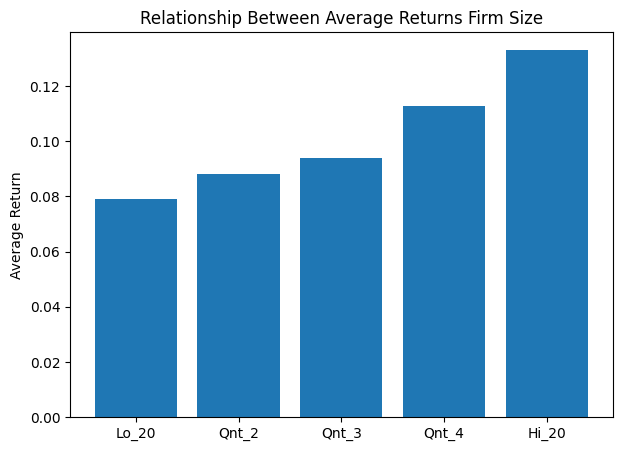

In [ ]:
grafica_portafolios(Average_Returns_ME, 0)

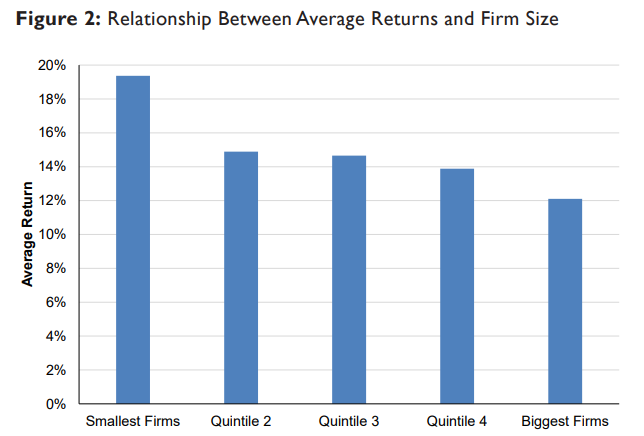

2). Book - to - Market Ratio Portfolios

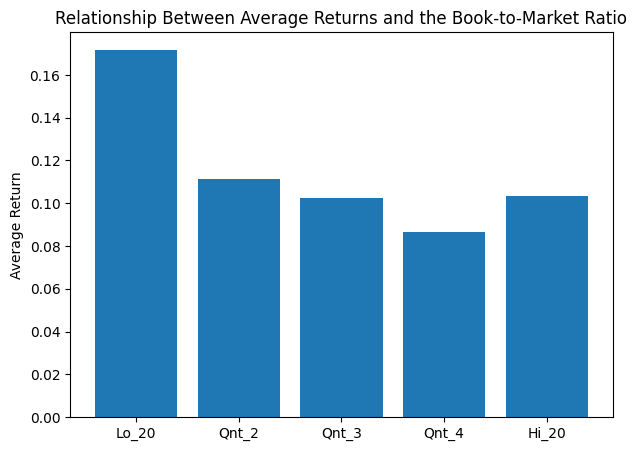

In [ ]:
grafica_portafolios(Average_Returns_BM, 1)

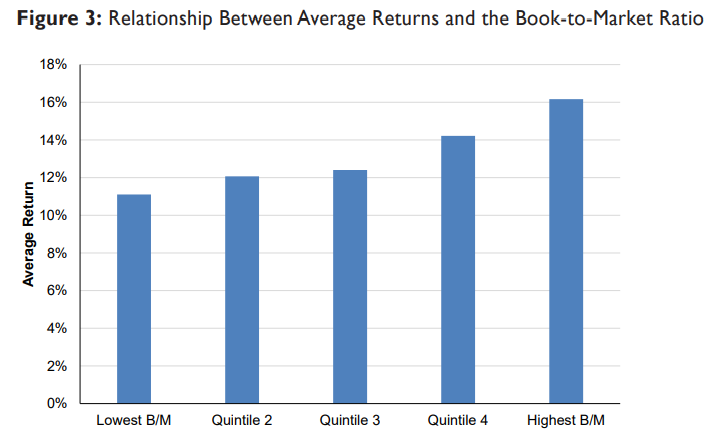


3). Operating Porfitability Portfolios

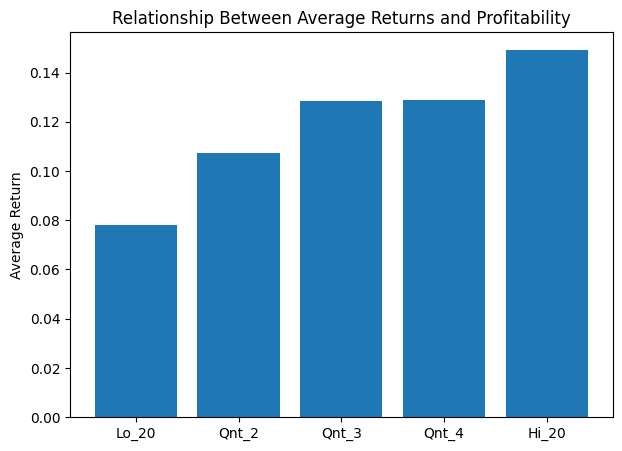

In [ ]:
grafica_portafolios(Average_Returns_OP, 2)

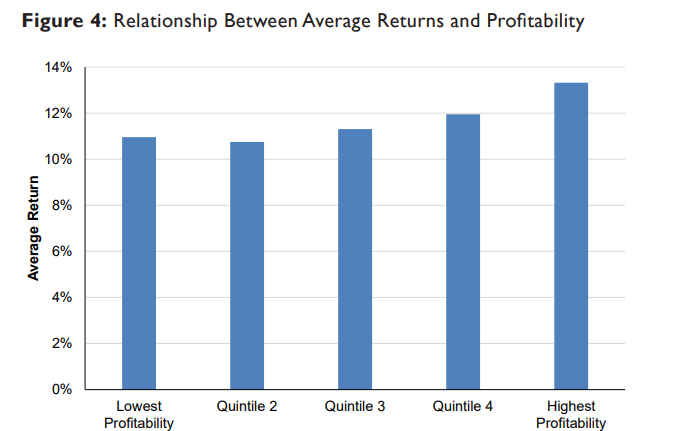

4). Investment Portfolios

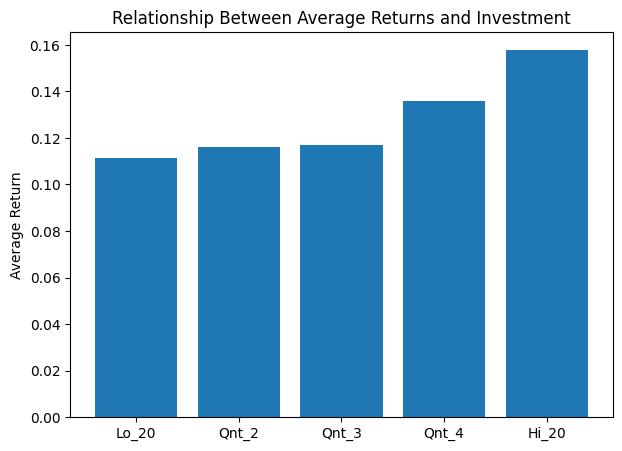

In [ ]:
grafica_portafolios(Average_Returns_INV, 3)

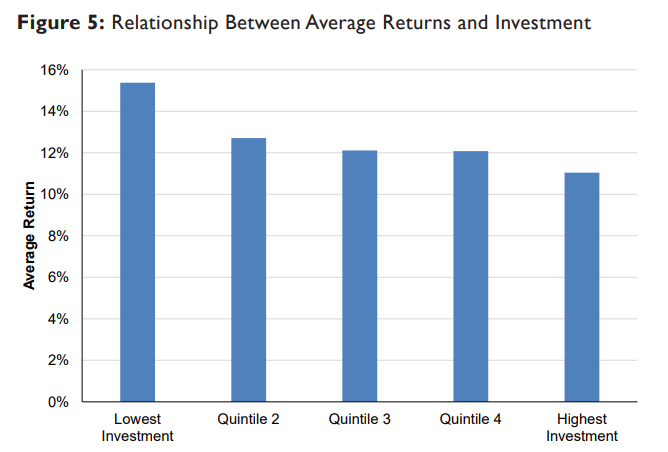

5). Market Beta Portfolios

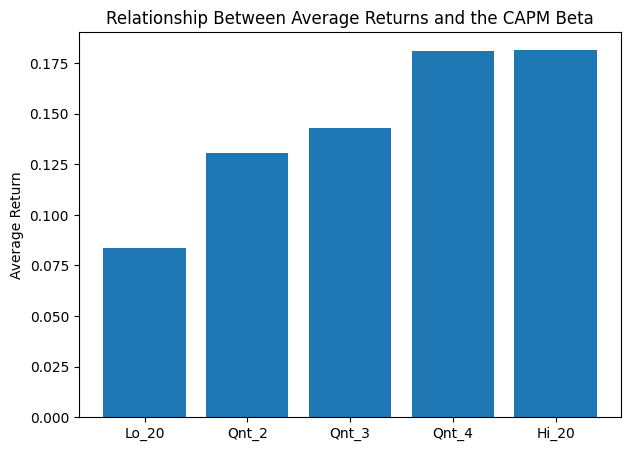

In [ ]:
grafica_portafolios(Average_Returns_MB, 4)

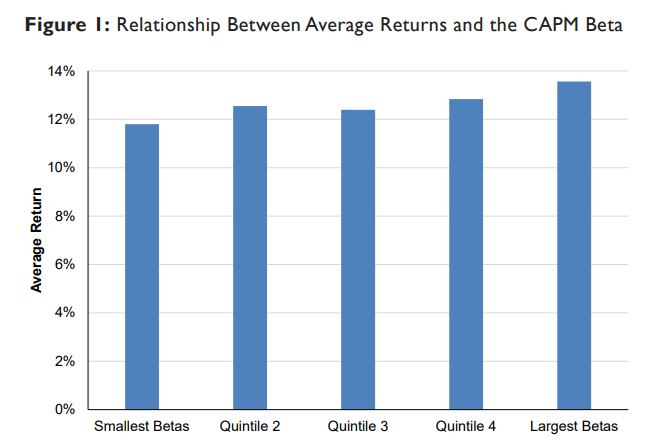

6). Momentum Portfolios

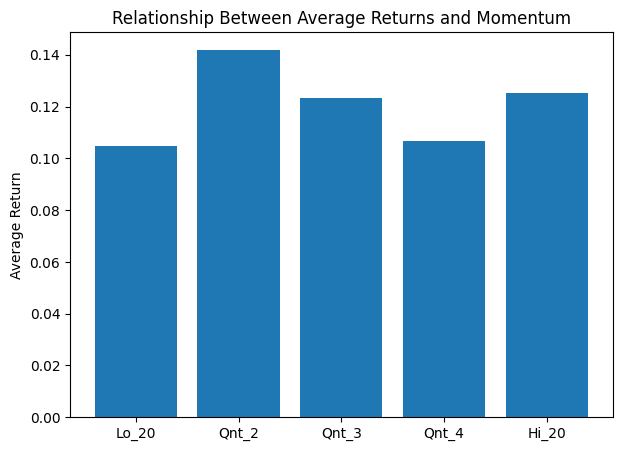

In [ ]:
grafica_portafolios(Average_Returns_M, 5)

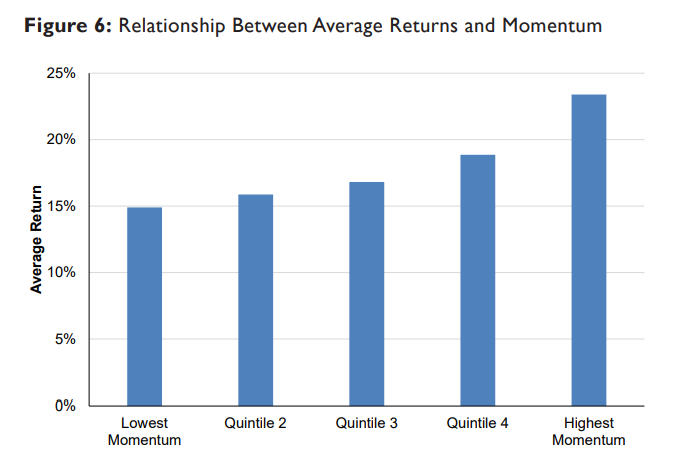

2. La idea de un factor es que capture una dimensión de riesgo. Los factores de
Fama y French son diferencias de retornos de portafolios formados a partir de una
misma dimensión. Por ejemplo, SMB es un factor formado a partir de la diferencia
entre el retorno por invertir en firmas pequeñas (Small) y firmas grandes (Big).
Para cada dimensión de riesgo (excepto Beta) proponga un factor formado a partir
de la diferencia de dos retornos dentro de la misma dimensión. Calcule para cada
factor la media, la desviación y grafique la serie de tiempo. Discuta los resultados

In [ ]:
# Calculo de la diferencia de retornos para factores dados

df_retornos = pd.DataFrame()
columns = ['Size', 'BTM', 'OP', 'INV', 'B', 'M'] # Dimensiones

j = 0
for i in range(len(Lista_df)):
    if j==4:
      j+=1 # Beta no es necesario - omite el beta
    else:
      df_retornos[columns[j]] = Lista_df[i]['Lo_20'] - Lista_df[i]['Hi_20'] # Size - BTM - OP - INV - M
      j+=1

print('\tDiferencia de retornos de los diferentes factores')
print(df_retornos)

# Calcular la media
medias = df_retornos.mean()

# Calcular la desviación estándar
desviaciones = df_retornos.std()

print('')
print("Medias de los factores:")
print(medias)
print("\nDesviaciones estándar de los factores:")
print(desviaciones)


	Diferencia de retornos de los diferentes factores
           Size       BTM        OP       INV         M
Fecha                                                  
2015  -0.095167  0.146360 -0.042027 -0.131917 -0.331122
2016   0.094918 -0.180871 -0.087659  0.163731  0.313181
2017  -0.081763  0.152150 -0.101920 -0.236054 -0.054868
2018  -0.094510  0.191491  0.041195 -0.010728 -0.198164
2019  -0.113146  0.095905 -0.173577 -0.075771 -0.012671
2020   0.051429  0.433570  0.046861 -0.168457 -0.146736
2021   0.010367 -0.168533 -0.303447  0.108755  0.255650
2022  -0.028303 -0.263826 -0.133924  0.287311 -0.249617
2023  -0.216932  0.259712  0.025053 -0.329151  0.375318
2024  -0.065871  0.015272  0.020891 -0.068997 -0.156436

Medias de los factores:
Size   -0.053898
BTM     0.068123
OP     -0.070855
INV    -0.046128
M      -0.020546
dtype: float64

Desviaciones estándar de los factores:
Size    0.089683
BTM     0.218688
OP      0.112909
INV     0.188669
M       0.249550
dtype: float64


	El promedio del factor Size es de: -0.05389764995744445


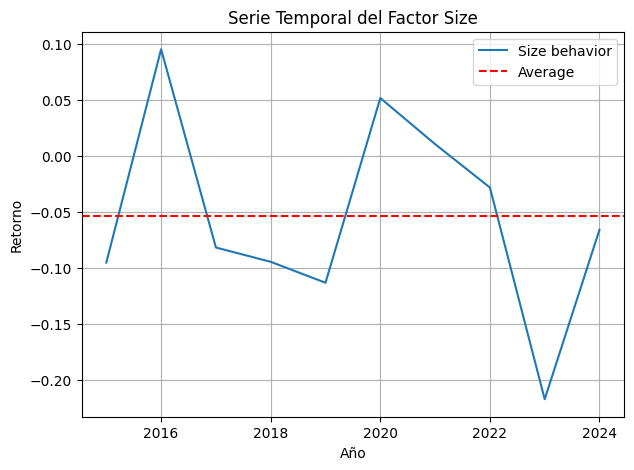

In [ ]:
# Graficar la serie temporal para Dimension en espefica
# ej 0, 0, 0 - indica size
grafica_tiempo(df_retornos.loc[:, columns[0]], 0, medias[0])

	El promedio del factor Book-to-Market Ratio es de: 0.06812324094056241


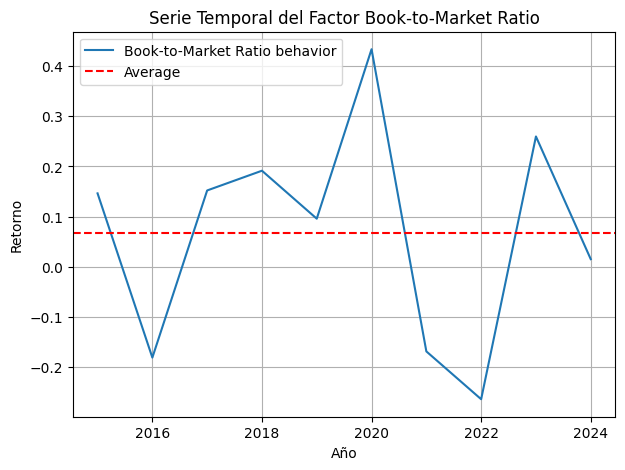

In [ ]:
grafica_tiempo(df_retornos.loc[:, columns[1]], 1, medias[1])

	El promedio del factor Profitability es de: -0.07085532827251494


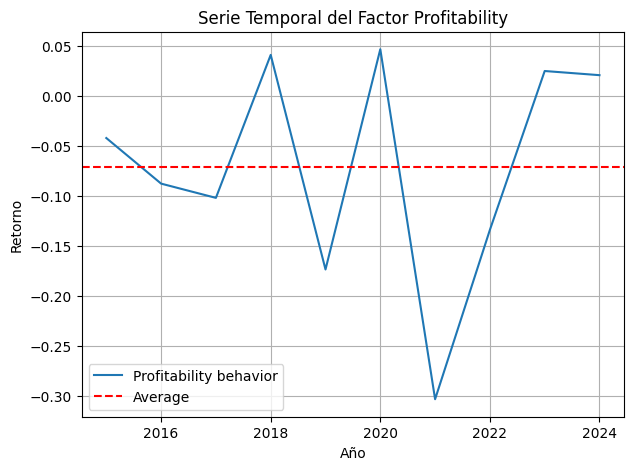

In [ ]:
grafica_tiempo(df_retornos.loc[:, columns[2]], 2, medias[2])

	El promedio del factor Investment es de: -0.04612769833491982


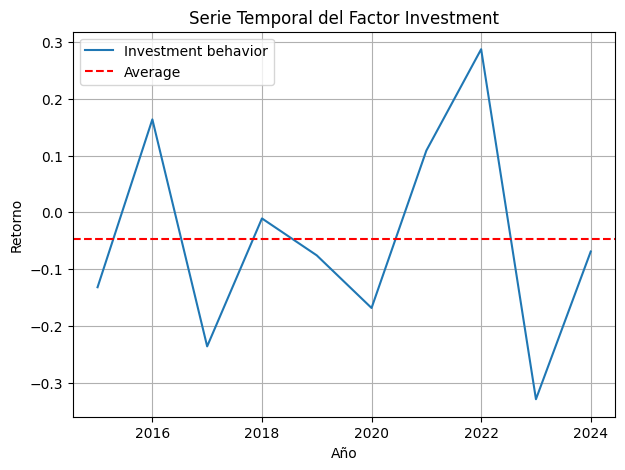

In [ ]:
grafica_tiempo(df_retornos.loc[:, columns[3]], 3, medias[3])

	El promedio del factor Momentum es de: -0.020546490674981276


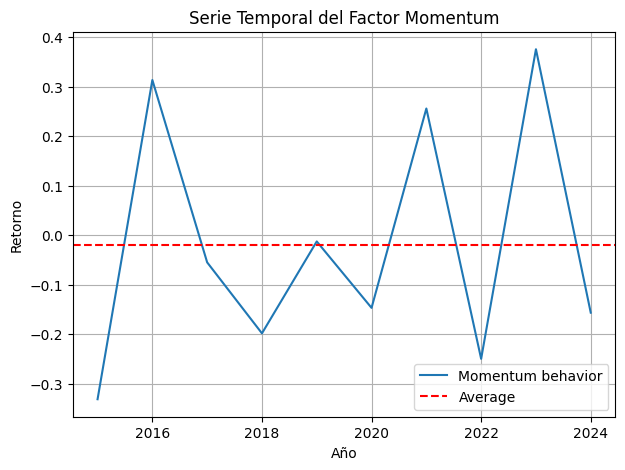

In [ ]:
grafica_tiempo(df_retornos.loc[:, columns[5]], 5, medias[4])


**Resultados**: Hallazgos de los portafolios y comparacion en las 6 dimensiones en el periodo de 1964-2014 y 2015-2024:


**-Dimension 1.** Portafolio con el factor de tamaño:
En en periodo de 1964-2014 Fama y French determinaron que el comportamiento de los portafolios de esta dimension tenian una relacion negativa significativa enre el tamaño de la empresa y su rendimiento promedio. Es decir que las firmas con tamaños mas pequeños obtenian rendimiento promedio mayores que las firmas mas grandes. En comparacion con los resultados del periodo 2015-2024 se puede apreciar que esta relacion a cambiado significativamente, al punto de que la relacion se ve totalmente inversa, es decir, ahora este dimension tiene una relacion positva entre el tamaño de la empresa y su rendimiento promedio, donde las empresas mas grandes obtienen rendimientos promedios mas grandes que las empresas de menor tamaño


**-Dimension 2.** Portafolio con el factor de valor:
En el periodo de 1964-2014 Fama y French determinaron el comportamiento de la compañias que tenian una ratio book-to-market mayor tenian rendimientos promedio mayores que las compañias con este ratio menor. Para el periodo de 2015-2014 estas regularidades cambiaon significativamente, pudiendose apreciar que son las compañias con un ratio book-to-market menor las que tienen rendimientos promedio superiores a las de alto ratio. (acciones de valor/sub - perspectivas de aumento de valor, acciones de crecimiento menores rentabilidades - sobrevaloracion)


**-Dimension 3.** Portafolio con el factor de rentabilidad: En el periodo de 1964-2014 Fama y French determinaron el comportamiento de la compañias que tenian una mayor rentabilidad operativa tenian rendimientos promedio mayores que las compañias con una rentabilidad operativa menor, esta regularidad en el periodo de 2015-2024 sigue estando presente y de manera mas notoria, por lo cual este factor sigue presentando un comportamiento similar, donde las empresas mas rentables obtienen rendimientos promedio mayores.

**-Dimension 4.** Portafolio con el factor de inversion:
En el periodo de 1964-2014 Fama y French determinaron el comportamiento de la compañias que tenian una menor inversion (menor cambio porcenrtual en el valor de los activos) obtenian mayores rendimientos promedio que las compañias con menor inversion. Para el periodo de 2015-2024 esta regularidad presenta un comportamiento inverso, en donde las empresas que obtienen mayores rendimientos promedio son compañias que tienen mayor inversion.

**-Dimension 5.** Portafolio con el factor CAPM Beta:
En el periodo de 1964-2014 Fama y French determinaron el comportamiento de la compañias que tuvieron mayor beta no explicaba un mayor retorno, es decirm que la relacion riesgo-retorno explicada a traves de este factor no era clara, en otras palabras un mayor riesgo no estaba explicando un mayor retorno. Para el periodo 2015-2024 esta regularidad presenta un cambio y segun lo evidenciado, las empresas con mayores beta (mayores riesgos) estaban efectivamente obtieniendo mayores rendimientos promedio que las compañias con menor beta.


**-Dimension 6.** Portafolio con el factor de Momentum:
En el periodo de 1964-2014 Fama y French determinaron el comportamiento de la compañias que tuvieron una gran apreciacion de precios de la accion en el ulltimo año, contuniarian con una alta apreciacion el año siguiente, por lo tanto teniand rendimientos promedio superiores. Para el periodo de 2015-2024, esta relacion no muestra una relacion muy clara de que esto se cumpla, no es muy evidente que en realidad compañias que se apreciacion en el ultimo año continue la aprecicacion y tengan rendimientos promedio superiores.



**Nota**: Como se puede apreciar los rendimientos promedio de las diferencias entre cada uno de lo factores, tienen altas desviacions estandar, por lo tanto como se puede ver en la grafica de serie de tiempo, estos factores varian mucho con el tiempo, por lo tanto los promedios y las relaciones puede variar mucho con el tiempo, por lo tanto las regularidades son muy sensibles y cambiantes


# Factor o Smart beta investing

¿A qué se refieren por factor o Smart beta investing y cuál es el raciocinio detrás de esto?

A lo que se refiere con Smart Beta investing es una metodologia de inversion que consta en capturar los altos (o potenciales) rendimientos esperados identidicados por factores (en este caso los 5 factores de Fama y French).

Este enfoque esta fundamentado en una combinacion de inversion pasiva y activa, ya que al ser un ETF esta persiguiendo un indice, pero al incorporar un indexacion fundamental (incorporar factores fundamentales para determinar los pesos de la inversion por accion) permite un ajuste de la ponderacion de manera activa segun las preferencias del inversor.

Este tipo de inversion permite la inversor no solo incorporar diferentes variables financieras como medio de ajustar y estructurar su producto financiero sino diversificar su inversion en terminos de activos pero tambien en terminos de potencial inversion segun los factores, es decir, surge como un metodo alternativo compo diversifcar un portafolio (diversificacion por factores) e incluir perspectivas adicionales del inversionista. Por lo tanto la exposiciones del inversionista seria a una serie de factores que explica sus pontenciales rendimientos

# Comparacion portafolios creados por el MSCI

Para el siguiente set de preguntas se le pide comprar los portafolios creados por el MSCI
factor indexes y el standard market capitalization-weithed iSahles ETF. Junto con el MSCI
USA diversified Multiple-Factor Index y el MSCI US large-mid-cap index (MSCI USA Index)

-Usando datos del exhibit 3 en una gráfica, grafique la frontera eficiente construida
a partir de (una gráfica dos fronteras):
1. Los cuatro índices individuales MSCI.
2. El iShare large-mid-cap Rusell 1000 ETF y el iShares small-cap Russell 2000
ETF

-Incluya en el gráfico los puntos que representan el MSCI USD Diversifed MultipleFator Index y el MSCI USA Index.

-¿Qué puede decir acerca del valor que crear portafolios a partir de factores?
¿Cómo lo compara con respecto a modelos tradicionales de inversión?


In [ ]:
# Librerias para cargar los datos de un excel

from google.colab import auth      #Importa el modulo auth del paquete google.colab
import gspread                     #Importa la libreria gspread
from google.auth import default    #Importa la funcion default del paquete google.auth


In [ ]:
auth.authenticate_user()          # Inicia el proceso de autenticación.
creds, _ = default()              # Guarda las credenciales obtenidas en el proceso de autorización
gc = gspread.authorize(creds)     # Usa las credenciales para crear la conexión con Google Sheets

In [ ]:
# Descarga y formateo de datos

Archivo='datos'            # Nombre de la hoja de cálculo
Hoja1 = gc.open(Archivo).worksheet('Hoja1')   # Abre la hoja de cálculo y selecciona la hoja 1
Valores1 = Hoja1.get_all_values()         # Trae la información almacenada en la hoja 1.

Columnas = Valores1[0]
datos1 =pd.DataFrame(Valores1[1:], columns=Columnas)

# Formateo de valores
for col in datos1.columns:
    datos1[col] = datos1[col].astype(float)
print(datos1.dtypes)

\nStandard_Deviation4    float64
Expected_Return4         float64
Standard_Deviation2      float64
Expected_Return_2        float64
dtype: object


In [ ]:
Archivo = 'datos2'
Hoja2 = gc.open(Archivo).worksheet('Hoja1')   # Abre la hoja de cálculo y selecciona la hoja 1
Valores2 = Hoja2.get_all_values()         # Trae la información almacenada en la hoja 1.

Columnas2 = Valores2[0]
datos2 = pd.DataFrame(Valores2[1:], columns=Columnas2)

# Formateo de valores
for col in datos2.columns:
    datos2[col] = datos2[col].astype(float)
print(datos2.dtypes)

Standard_Deviation_M      float64
Expected _Return_M        float64
Standard_Deviation_USA    float64
Expected_Return_USA       float64
dtype: object


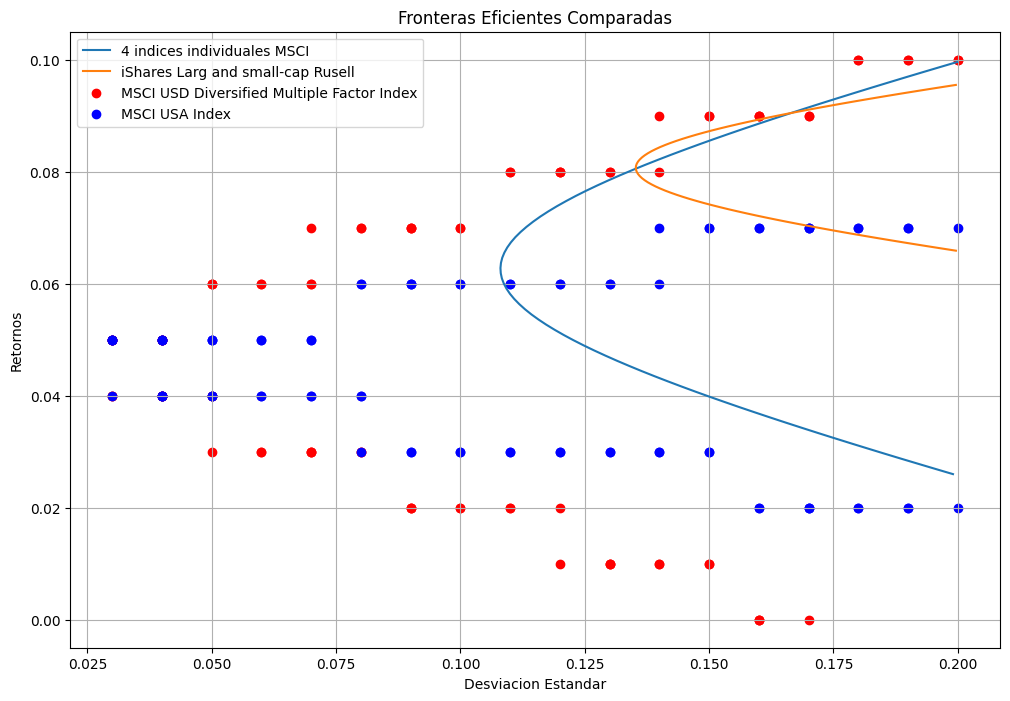

In [ ]:
# Ajustar el tamaño del gráfico
plt.figure(figsize=(12, 8))

# Graficar la frontera para Los cuatro índices individuales MSCI.
plt.plot(datos1['\nStandard_Deviation4'], datos1['Expected_Return4'], label='4 indices individuales MSCI')

# Graficar la frontera paraEl iShare large-mid-cap Rusell 1000 ETF y el iShares small-cap Russell 2000 ETF
plt.plot(datos1['Standard_Deviation2'], datos1['Expected_Return_2'], label='iShares Larg and small-cap Rusell')

# Graficar los puntos del MSCI USD Diversified Multiple Factor Index
plt.scatter(datos2['Standard_Deviation_M'], datos2['Expected _Return_M'], color='red', label='MSCI USD Diversified Multiple Factor Index')

# Graficar los puntos del MSCI USA Index
plt.scatter(datos2['Standard_Deviation_USA'], datos2['Expected_Return_USA'], color='blue', label='MSCI USA Index')

# Personalizar la apariencia de la gráfica
plt.title('Fronteras Eficientes Comparadas')
plt.xlabel('Desviacion Estandar')
plt.ylabel('Retornos')
plt.legend()  # Mostrar etiquetas de los datos
plt.grid(True)

# Mostrar la gráfica
plt.show()


Es evidente el valor que genera un portafolio creado a partir de factores, como se evidencia en los resultados del grafico, comparando con modelos tradicionales de inversion como el rastreo de un indice de manera tradicional, se puede evidenciar que un modelo producto financiero como el de MSCI multifactor (puntos rojos) genera mejores rendimientos que los modelos tradicionales, lo que se puede apreciar es que con este enfoque el ETF esta generando en ciertos puntos iguales y mayores rendimientos a menores niveles de riesgo, es decir esta generando valor al vencer la frontera eficiente y superponerse en unos puntos alcanzando mayores retornos con menor riesgo



# 5). Introduccion nuevo ETF multifactor

¿Debería iShares introducir un nuevo ETF multifactor de empresas grandes y medianas
para Estados Unidos? Explique.

Si, ya que esta oportunidad ofrece un acceso a ponteciales inversores a estrategias de inversion mas sofisticadas y especificas que tiene el potencial de reemplazar estrategias de inversion tradicionales, ademas las dinamicas del mercado se inclinaran a productos que ofrezcan mejores desempeños, por lo tanto, la demanda es posible. La oportunidad iShares la puede encontrar por medio de inversores con un enfoque diferente, que comprendan las caracteristicas del producto, que si bien les puede generar valor, les puede generar rentabilidades adicionales en el largo plazo


# 6). Inversion en ETF Smart Beta

¿invertiría usted en un ETF de Smart beta? ¿por qué?

Si, invertiria en un ETF Smart beta, porque en primer lugar estos ETF estan diseñados para proporcionar una mayor diversificacion que los indices ponderados tradicionalmente. En segundo lugar me permite seguir ciertas estrategias de inversion donde la exposicion al riesgo este en diferentes factores, permitiendome asi exponerme a factores potenciales de rentabilidades, pero en si invertiria en ellos porque estos ETF tienen la capacidad y potencial para superar al mercado y lograr rentabilidades superiores, esto en comparacion al bajo costo de entrar a un ETF

# 7). iShares identifique los portafolios Smart beta

De la página web de iShares identifique los portafolios Smart beta ofrecidos actualmente.
¿le interesa alguno? ¿cuáles? ¿por qué?


iShares actualemnte esta ofreciendo una serie de portafolios Smart beta, en diferentes factores, entre ellos: Factor unico, Multifactor, Volatilidad minima, y renta fija.

A mi personalmente me llamo la atencion, despues de analizado el caso el Multifactor, porque por medio de este proporciona una exposicion diversificada a una varidad de factores, espeficifamente el iShares International Equity Factor ETF. TICKER (INTFUN).

Este ETF de iShares se enfoca en seguir los resultados de inversión de un índice compuesto por acciones de grandes y medianas empresas de mercados desarrollados a nivel mundial, excluyendo Estados Unidos. Estas acciones son seleccionadas porque tienen una exposición favorable a ciertos factores de estilo de inversión específicos, pero dentro de ciertos límites o restricciones.

Este ETF ha sido uno de los ETF que ofrece iShares que en los ultimos 5 años su desempeño ha logrado superiores retornos que su BenchMark (STOXX International Equity Factor Index (USD)) mantiendo mismos niveles de riesgo, lo cual genera valor y atraccion al inversionista.

Dos factores de ademas llamaron mi atencion es que su beta es relativamente bajo, de alrededor de 0.85 en los ultimos 3 años y sus costo a un portafolio diversificado es bajo, cotiza a fecha de hoy a 28.84 dolares y su tarifa de administracion es de tan solo de 0.15%

